### Importing modules and file and setting columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data.xlsx'
data = pd.read_excel(file_path)

series1 = data['Data Series 1'].values
series2 = data['Data Series 2'].values

### Basic stats

In [2]:
def basic_statistics(series):
    mean = np.mean(series)
    median = np.median(series)
    variance = np.var(series)
    std_dev = np.std(series)
    iqr = np.percentile(series, 75) - np.percentile(series, 25)
    min_value = np.min(series)
    max_value = np.max(series)
    return mean, median, variance, std_dev, iqr, min_value, max_value

mean1, median1, variance1, std_dev1, iqr1, min1, max1 = basic_statistics(series1)
mean2, median2, variance2, std_dev2, iqr2, min2, max2 = basic_statistics(series2)

covariance = np.cov(series1, series2)[0, 1]
correlation = np.corrcoef(series1, series2)[0, 1]

print("Statistics for Series 1:")
print(f"Mean: {mean1}, Median: {median1}, Variance: {variance1}, Std Dev: {std_dev1}, IQR: {iqr1}, Min: {min1}, Max: {max1}")
print("Statistics for Series 2:")
print(f"Mean: {mean2}, Median: {median2}, Variance: {variance2}, Std Dev: {std_dev2}, IQR: {iqr2}, Min: {min2}, Max: {max2}")
print(f"Covariance between Series 1 and Series 2: {covariance}")
print(f"Correlation between Series 1 and Series 2: {correlation}")


Statistics for Series 1:
Mean: 1.5517067088507077, Median: 1.2631346585297667, Variance: 1.4421270517036335, Std Dev: 1.2008859445024884, IQR: 1.6040335253944866, Min: 0.015027378620975413, Max: 6.023752548696922
Statistics for Series 2:
Mean: 1.4378797473729819, Median: 1.2748212193203754, Variance: 1.462628202612294, Std Dev: 1.2093916663398563, IQR: 2.330254600897244, Min: 0.0, Max: 4.233592328347665
Covariance between Series 1 and Series 2: 0.28656995093450677
Correlation between Series 1 and Series 2: 0.194027227140934


### Creating variogram function

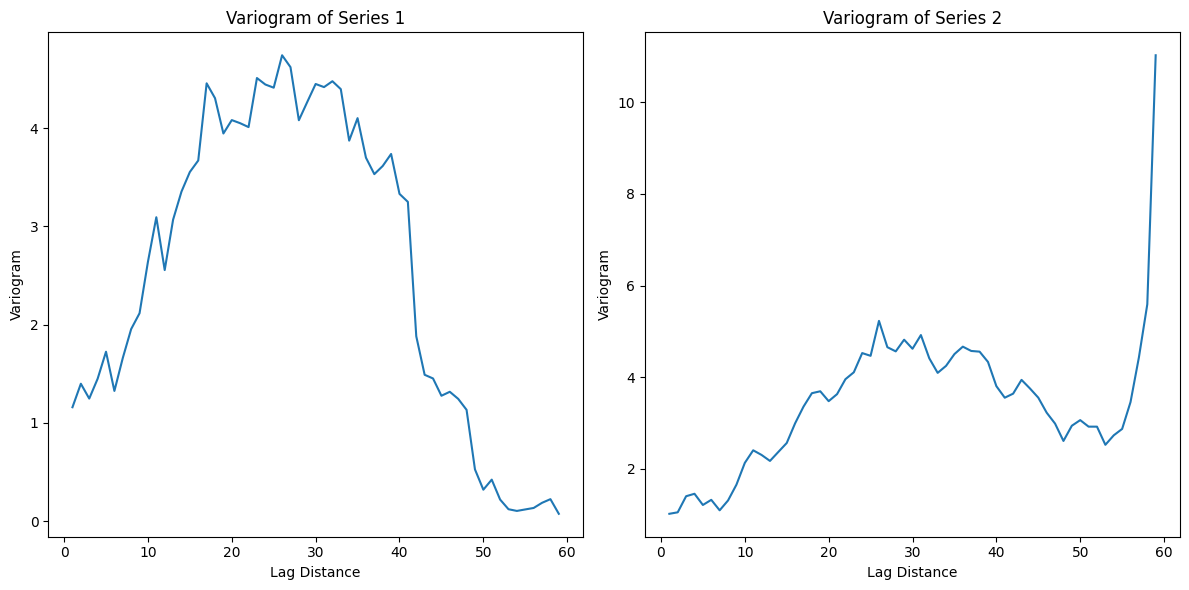

In [3]:
def variogram(series):
    n = len(series)
    variogram_values = []
    lags = []
    for lag in range(1, n):
        differences = series[:-lag] - series[lag:]
        squared_diff = differences**2
        variogram_values.append(np.mean(squared_diff))
        lags.append(lag)
    return np.array(lags), np.array(variogram_values)

distances1, variogram1 = variogram(series1)
distances2, variogram2 = variogram(series2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(distances1, variogram1, label="Series 1 Variogram")
plt.xlabel('Lag Distance')
plt.ylabel('Variogram')
plt.title('Variogram of Series 1')

plt.subplot(1, 2, 2)
plt.plot(distances2, variogram2, label="Series 2 Variogram")
plt.xlabel('Lag Distance')
plt.ylabel('Variogram')
plt.title('Variogram of Series 2')

plt.tight_layout()
plt.show()

### Defining Cross variogram

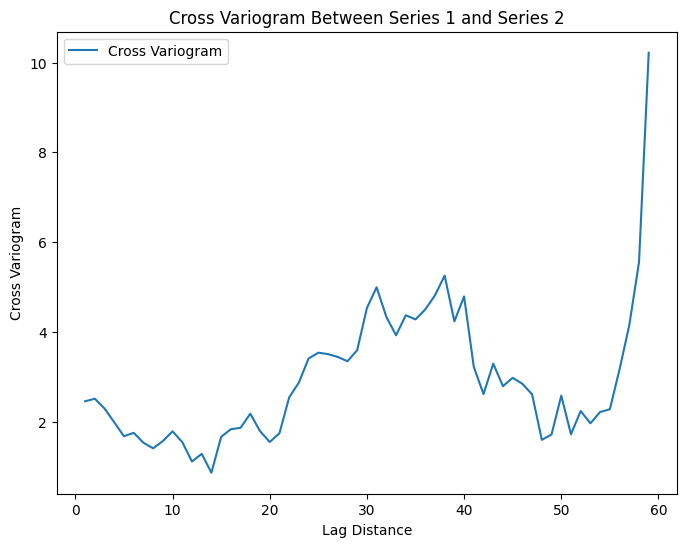

In [4]:
def cross_variogram(series1, series2):
    n = len(series1)
    cross_variogram_values = []
    lags = []
    for lag in range(1, n):
        differences = (series1[:-lag] - series2[lag:])
        squared_diff = differences**2
        cross_variogram_values.append(np.mean(squared_diff))
        lags.append(lag)
    return np.array(lags), np.array(cross_variogram_values)

cross_distances, cross_variogram_values = cross_variogram(series1, series2)

plt.figure(figsize=(8, 6))
plt.plot(cross_distances, cross_variogram_values, label="Cross Variogram")
plt.xlabel('Lag Distance')
plt.ylabel('Cross Variogram')
plt.title('Cross Variogram Between Series 1 and Series 2')
plt.legend()
plt.show()

### Setting up for auto suggestion of offset

In [ ]:
offset = cross_distances[np.argmin(cross_variogram_values)]
print(f"Suggested offset based on the cross-variogram: {offset} meters")

Suggested offset based on the cross-variogram: 14 meters
